In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('default')
from collections import Counter, defaultdict
import math
import scipy.stats
#plt.style.available

In [2]:
data = pd.read_csv("../kc_house_data.csv")
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715.0,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060.0,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570


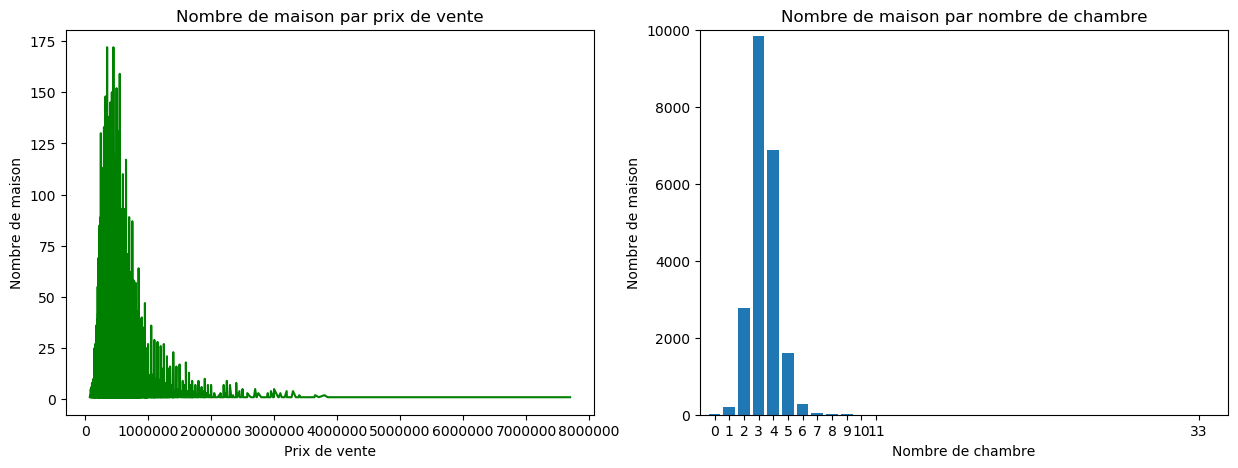

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1, ax2 = axes.flatten()

price = defaultdict(int)
for nbre in data['price']:
    price[nbre] += 1
price = sorted(price.items(), key=lambda x: x[0])

ax1.plot([x for (x,y) in price], [y for (x,y) in price], color="green", linestyle="solid")
ax1.set_title("Nombre de maison par prix de vente")
ax1.set_ylabel("Nombre de maison")
ax1.set_xlabel("Prix de vente")


bedrooms = defaultdict(int)
for nbre in data['bedrooms']:
    bedrooms[nbre] += 1
bedrooms = sorted(bedrooms.items(), key=lambda x: x[0])
sx = [i + 0.1 for i,_ in enumerate(bedrooms)]
ax2.bar([x for (x,y) in bedrooms], [y for (x,y) in bedrooms])
ax2.set_xticks([x for (x,y) in bedrooms])
ax2.axis([-1, 35, 0, 10000])
ax2.set_ylabel("Nombre de maison")
ax2.set_xlabel("Nombre de chambre")
ax2.set_title("Nombre de maison par nombre de chambre")
fig.savefig('price_bedrooms.png', transparent = True)

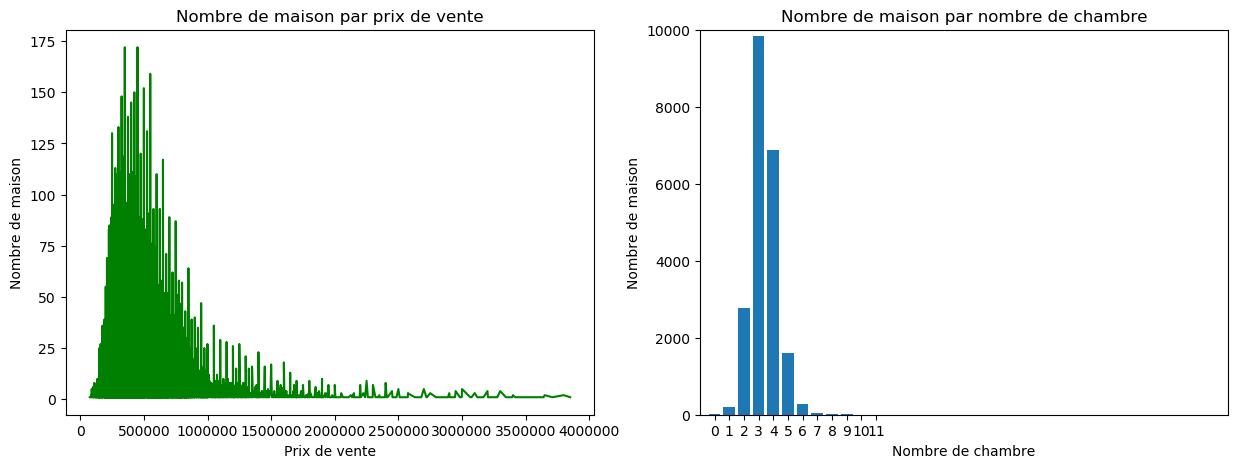

In [4]:
X = []
Y = []

for x in range(len(data['bedrooms'])):
    if data['bedrooms'][x] <= 11 and data['price'][x] < 4000000:
        X.append(data['price'][x])
        Y.append(data['bedrooms'][x])
        
X = np.asarray(X, dtype=np.float32)
Y = np.asarray(Y, dtype=np.float32)
        
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1, ax2 = axes.flatten()

price = defaultdict(int)
for nbre in X:
    price[nbre] += 1
price = sorted(price.items(), key=lambda x: x[0])

ax1.plot([x for (x,y) in price], [y for (x,y) in price], color="green", linestyle="solid")
ax1.set_title("Nombre de maison par prix de vente")
ax1.set_ylabel("Nombre de maison")
ax1.set_xlabel("Prix de vente")


bedrooms = defaultdict(int)
for nbre in Y:
    bedrooms[nbre] += 1
bedrooms = sorted(bedrooms.items(), key=lambda x: x[0])
sx = [i + 0.1 for i,_ in enumerate(bedrooms)]
ax2.bar([x for (x,y) in bedrooms], [y for (x,y) in bedrooms])
ax2.set_xticks([x for (x,y) in bedrooms])
ax2.axis([-1, 35, 0, 10000])
ax2.set_ylabel("Nombre de maison")
ax2.set_xlabel("Nombre de chambre")
ax2.set_title("Nombre de maison par nombre de chambre")
fig.savefig('price_bedrooms_norme.png', transparent = True)

In [7]:
#Covariance
covariance = np.cov(X, Y, bias=True)[0][1]
print(covariance)

100296.92773045272


In [8]:
#correlation
correlation = np.corrcoef(X, Y).round(decimals=2)
print(correlation)

[[1.   0.32]
 [0.32 1.  ]]


In [9]:
result = scipy.stats.linregress(X, Y)

In [10]:
print(result.slope) #Pente de la droite de regrésssion
print(result.intercept) #Ordonnée à l'origine de la droite de regression
print(result.rvalue) # Le coefficent de corélation
print(result.pvalue) #Valeur de p
print(result.stderr) #Erreur type du gradien estimé ???

8.29102625106743e-07
2.9229741267744105
0.3178707569092036
0.0
1.6827542283252943e-08


In [11]:
slope, intercept, r, p, stderr = scipy.stats.linregress(X, Y)

In [12]:
line = f'Ligne de regréssion: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)
print(slope)

Ligne de regréssion: y=2.92+0.00x, r=0.32
8.29102625106743e-07


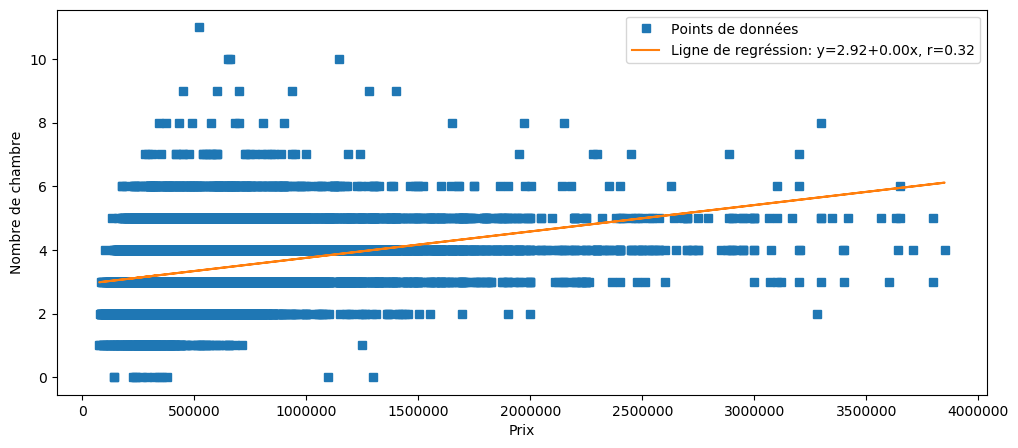

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
ax.plot(X, Y, linewidth=0, marker='s', label='Points de données')
ax.plot(X, intercept + slope * X, label=line)
ax.set_xlabel('Prix')
ax.set_ylabel('Nombre de chambre')
ax.legend(facecolor='white')
fig.savefig('price_bedrooms_regression.png', transparent = True)


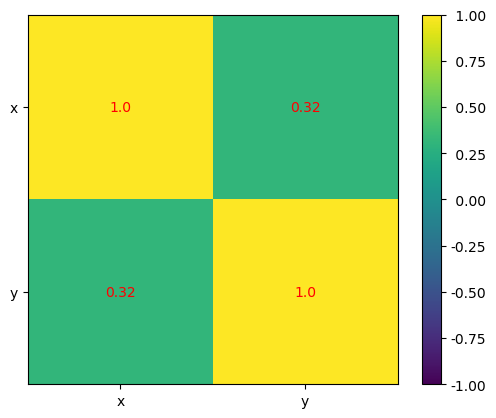

In [120]:
fig, ax = plt.subplots()
im = ax.imshow(correlation)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
#ax.set_ylim(2.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, correlation[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()